In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Solve_Data:

    def get_json(self, json_path):

        f = open(json_path, "r")
        loaded_json = json.loads(f.read())
        f.close()
    
        return loaded_json

    def __init__(self, json_path):

        loaded_json = self.get_json(json_path)
        
        self.id = loaded_json["id"]
        self.solver_class = loaded_json["solver_class"]
        self.initiated = bool(loaded_json["initiated"])
        self.converged = bool(loaded_json["converged"])
        self.terminated = bool(loaded_json["terminated"])
        self.iteration = int(loaded_json["iteration"])
        self.elapsed_time_ms = loaded_json["elapsed_time_ms"]
        self.res_norm_history = np.array(loaded_json["res_norm_history"])

In [3]:
data_dir = "C:\\users\\dosre\\dev\\data-transfer\\conv-diff-2000-pox\\sg_0\\conv_diff_2000\\0"
fp16 = Solve_Data(os.path.join(data_dir, "FP16.json"))
fp32 = Solve_Data(os.path.join(data_dir, "FP32.json"))
fp64 = Solve_Data(os.path.join(data_dir, "FP64.json"))
sct = Solve_Data(os.path.join(data_dir, "SimpleConstantThreshold.json"))

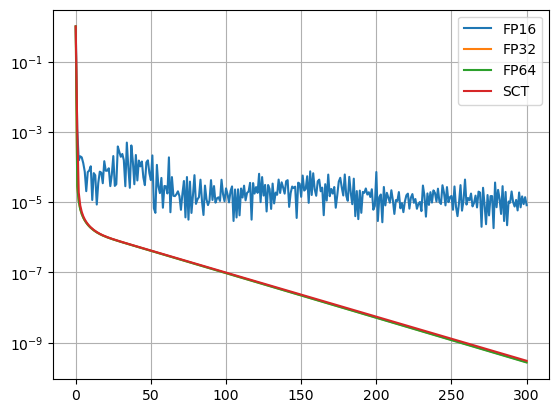

In [4]:
fig, ax = plt.subplots()

ax.semilogy(fp16.res_norm_history/fp16.res_norm_history[0], label="FP16")
ax.semilogy(fp32.res_norm_history/fp32.res_norm_history[0], label="FP32")
ax.semilogy(fp64.res_norm_history/fp64.res_norm_history[0], label="FP64")
ax.semilogy(sct.res_norm_history/sct.res_norm_history[0],  label="SCT")

ax.legend()
ax.grid()

plt.show()